# Importing libraries

In [13]:
from sklearn.model_selection import train_test_split as tt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
x_train = pd.read_csv(r'assets\files\Linear_X_Train.csv')
x_test = pd.read_csv(r'assets\files\Linear_X_Test.csv')
y_train = pd.read_csv(r'assets\files\Linear_Y_Train.csv')
x_train.shape, x_test.shape, y_train.shape

((3750, 1), (1250, 1), (3750, 1))

# Data Analysis

In [3]:
x_train.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3750 non-null   float64
dtypes: float64(1)
memory usage: 29.4 KB


In [5]:
x_train.describe()

,x
count,3750.000000
mean,-0.037795
std,0.992212
min,-3.546299
25%,-0.698443
50%,-0.035028
75%,0.629425
max,4.091393


In [6]:
x_test.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [8]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1250 non-null   float64
dtypes: float64(1)
memory usage: 9.9 KB


In [7]:
x_test.describe()

,x
count,1250.000000
mean,-0.040106
std,1.004994
min,-2.620627
25%,-0.713155
50%,-0.044434
75%,0.628936
max,3.700396


In [11]:
y_train.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [9]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       3750 non-null   float64
dtypes: float64(1)
memory usage: 29.4 KB


In [10]:
y_train.describe()

,y
count,3750.000000
mean,0.683869
std,81.102629
min,-286.959739
25%,-54.036989
50%,0.180640
75%,54.695511
max,348.899461


In [15]:
train = pd.concat([x_train, y_train], axis=1)
train.head()

,x,y
0,-0.289307,-0.091101
1,-0.588810,-53.467721
2,1.027507,75.457009
3,-0.259013,-12.025286
4,0.782043,57.414187


# Plotting graphs

## Scatter

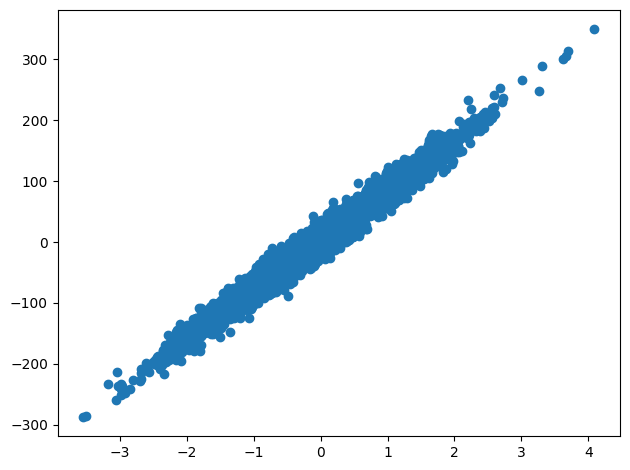

In [32]:
plt.scatter(x_train,y_train)
plt.tight_layout()

plt.show()

## Reg Plot

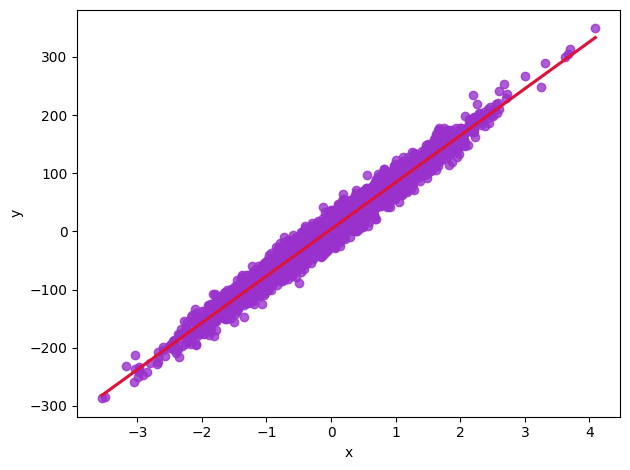

In [31]:
sns.regplot(
    x=x_train,
    y=y_train,
    scatter=True,
    line_kws={'color': 'crimson'},
    scatter_kws={'color': 'darkorchid'},
)
plt.tight_layout()

plt.show()

## Correlation

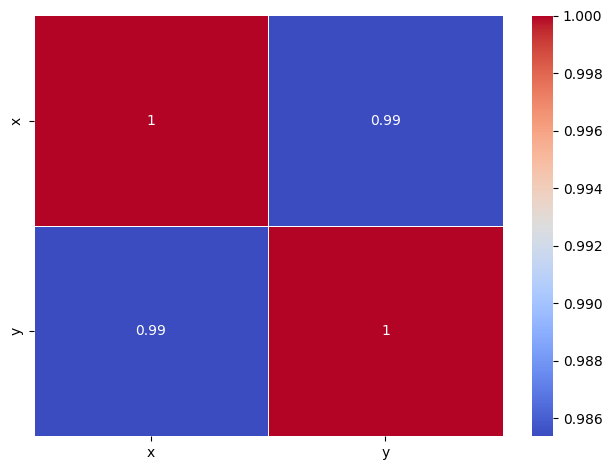

In [30]:
sns.heatmap(
    train.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.tight_layout()

plt.show()

## Violin Plot

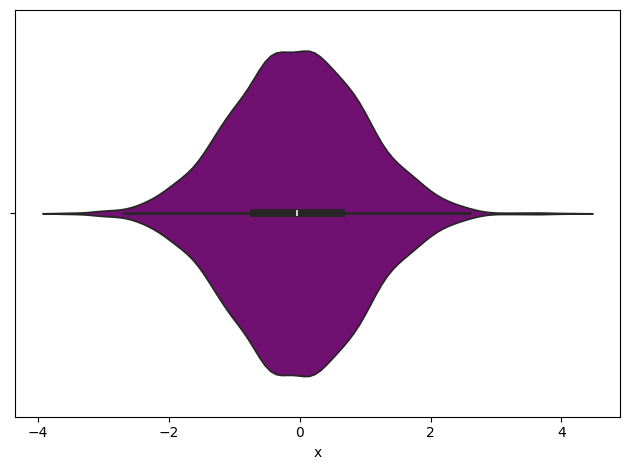

In [29]:
sns.violinplot(
       x=train['x'],
       color="purple"
    )
plt.tight_layout()

plt.show()

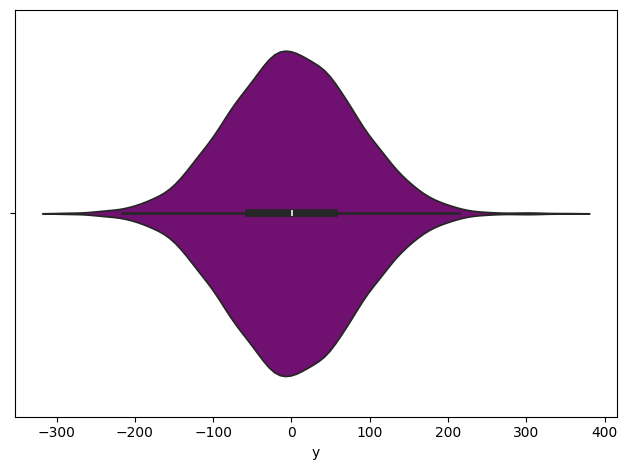

In [33]:
sns.violinplot(
       x=train['y'],
       color="purple"
    )
plt.tight_layout()

plt.show()

### Fitting the model

In [34]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

### predicting output

In [35]:
y_pred = linear_regression.predict(x_test)
y_pred

array([[-147.52847525],
       [ -66.26699842],
       [-200.06209345],
       ...,
       [  14.0382031 ],
       [ -18.66616899],
       [ -51.07594693]])

In [36]:
y_pred.shape

(1250, 1)

In [37]:
y_predicted = pd.DataFrame(y_pred)
y_predicted.head()

,0
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [38]:
y_predicted.rename(columns={0: 'y'}, inplace=True)
y_predicted.head()

,y
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [39]:
y_predicted.to_csv(r'assets/files/Linear_Y_Pred.csv', index='False')

In [40]:
predicted_test = pd.concat([
    x_test,
    y_predicted
], axis=1)
predicted_test.head()

,x,y
0,-1.877944,-147.528475
1,-0.869032,-66.266998
2,-2.530182,-200.062093
3,2.760205,226.044960
4,0.591000,51.329285


# Plots

## Scatter Plot for Predicted Y

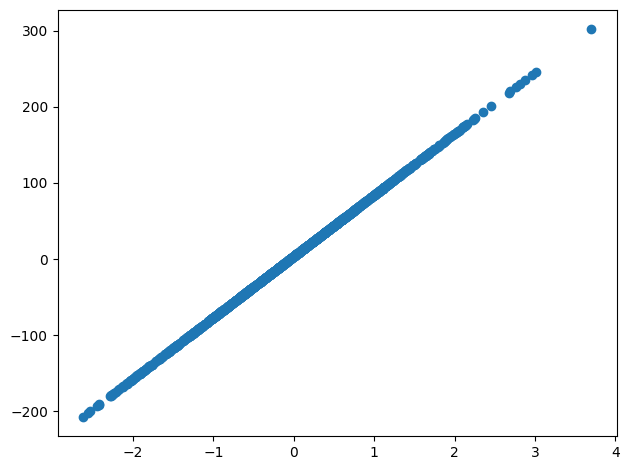

In [41]:
plt.scatter(predicted_test['x'], predicted_test['y'])
plt.tight_layout()

plt.show()

## Reg Plot for predicted Y

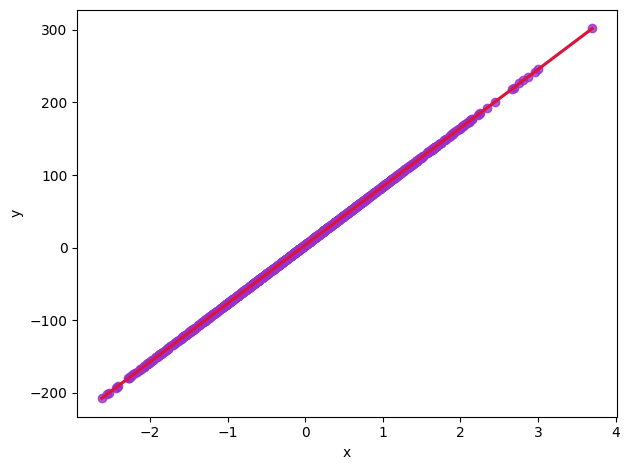

In [42]:
sns.regplot(
    x=predicted_test['x'],
    y=predicted_test['y'],
    scatter=True,
    line_kws={'color': 'crimson'},
    scatter_kws={'color': 'darkorchid'},
)
plt.tight_layout()

plt.show()

## Correlation for predicted Y

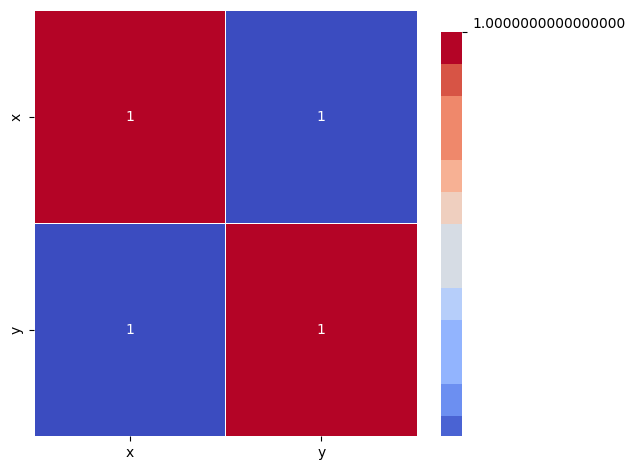

In [43]:
sns.heatmap(
    predicted_test.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.tight_layout()

plt.show()

## Violin Plot for X test and predicted Y

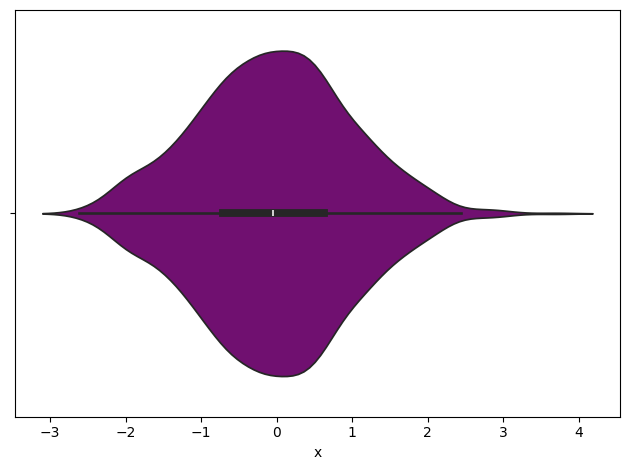

In [44]:
sns.violinplot(
       x=predicted_test['x'],
       color="purple"
    )
plt.tight_layout()

plt.show()

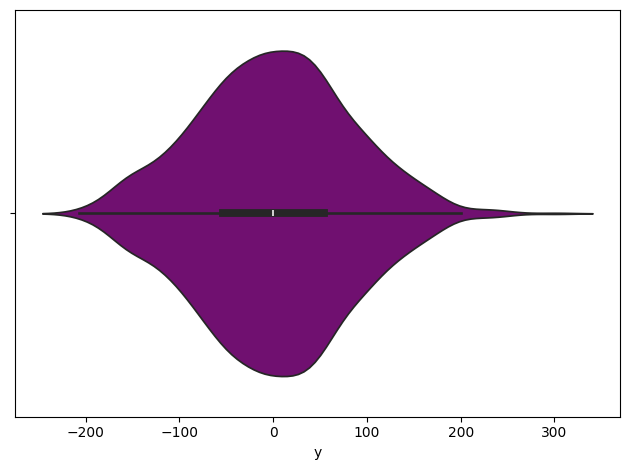

In [45]:
sns.violinplot(
       x=predicted_test['y'],
       color="purple"
    )
plt.tight_layout()

plt.show()